# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.tree import export_graphviz
import graphviz
import random

# Reading the data

In [2]:
# .csv files must be in same folder as this code if not then give the exact path name.

df=pd.read_csv('bikes.csv')

df1=df.values[:,:]
dict1 = {0: 'Season', 1:'Year', 2: 'Month', 3: 'Holiday', 4: 'Weekday', 5: 'Working Days', 6:'Weather',7:'Temperature',8:'Humidity',9:'Windspeed' }

#Randomizing the data to improve the accuracy
random.shuffle(df1)    

data=df1[:,1:11]   
value=df1[:,11]

l=int(len(data)*0.9)
data_test=data[l:,:]
value_test=value[l:]
data_train=data[0:l,:]
value_train=value[0:l]

# Function for Calculating Nodes and Leaf Nodes in a Graph

In [3]:
# Used http://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html documentaion

def nodes(clf):
    n_nodes = clf.tree_.node_count
    children_left = clf.tree_.children_left
    children_right = clf.tree_.children_right
    feature = clf.tree_.feature
    threshold = clf.tree_.threshold

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

            n_leaves=np.sum(is_leaves==True)

    return int(n_nodes),int(n_leaves)

# Function for calculating the Mean Square Error

In [4]:
def MSE(predictedvalues,truevalues):
    n=predictedvalues.shape[0]
    error=0
    for i in range(0,n):
        error=error+pow((float(predictedvalues[i])-(truevalues[i])),2)
    error=float(error)/n
    return (error)

# Part (i)

### Making Decision Tree

In [5]:
tree = DecisionTreeRegressor()
tree = tree.fit(data_train,value_train)

### Exporting the tree in .dot format

In [6]:
export_graphviz(tree,out_file="mytree.dot",filled=True,rounded=True,impurity=False)

### The Resulting Decision Tree

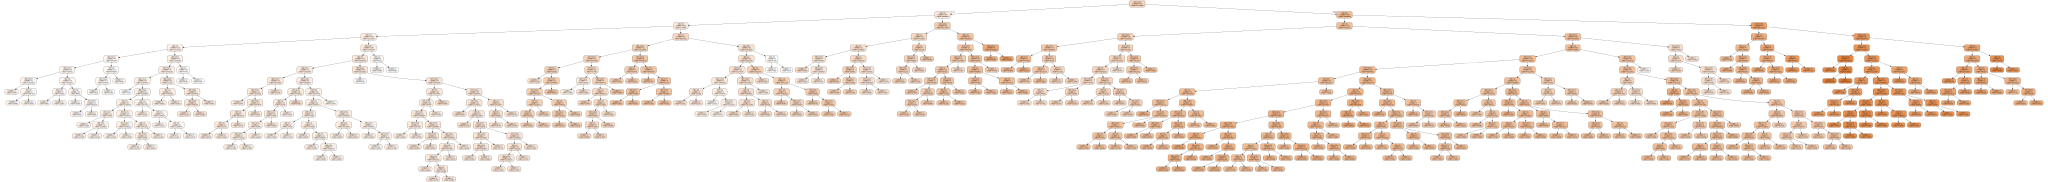

In [7]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph).render('Regression Tree')
graphviz.Source(dot_graph)

### Nodes and Leaf Nodes

In [8]:
totalnodes,leaf=nodes(tree)
print "Total Number of Nodes :",totalnodes
print "Total Number of Leaf Nodes :",leaf

Total Number of Nodes : 651
Total Number of Leaf Nodes : 326


### Extracting Importance of Features

In [9]:
imp=tree.feature_importances_

### Variables that appears in the tree

In [10]:
print "List of Variables that appear in the tree"
print "-----------------------------------------"
for i in range(0,len(imp)):
    if imp[i]>0:
        print dict1[i]

List of Variables that appear in the tree
-----------------------------------------
Season
Year
Month
Holiday
Weekday
Working Days
Weather
Temperature
Humidity
Windspeed


### Important Variables

In [11]:
print "List of Important Variables"
print "---------------------------"
for i in range(0,len(imp)):
    if imp[i]>=0.03:
        print dict1[i]

List of Important Variables
---------------------------
Year
Month
Temperature
Humidity


### Calculating Mean Square Error

In [12]:
pred_value = tree.predict(data_test)
mse1 = MSE(pred_value,value_test)
print "Mean Square Error for Case 1:",mse1

Mean Square Error for Case 1: 339502.054054


# Part (ii)

### Re-Coding the months as mentioned in the problem

In [13]:
for i in range(0,len(data)):
    if data[:,2][i]==1:
        data[:,2][i]=1
    if data[:,2][i]==2:
        data[:,2][i]=1
    if data[:,2][i]==3:
        data[:,2][i]=3
    if data[:,2][i]==4:
        data[:,2][i]=3
    if data[:,2][i]==11:
        data[:,2][i]=3
    if data[:,2][i]==12:
        data[:,2][i]=3
    if data[:,2][i]==5:
        data[:,2][i]=2
    if data[:,2][i]==6:
        data[:,2][i]=2
    if data[:,2][i]==7:
        data[:,2][i]=2
    if data[:,2][i]==8:
        data[:,2][i]=2       
    if data[:,2][i]==9:
        data[:,2][i]=2
    if data[:,2][i]==10:
        data[:,2][i]=2

### Training and testing data

In [14]:
data_test=data[l:,:]
value_test=value[l:]
data_train=data[0:l,:]
value_train=value[0:l]

### Making Decision Tree

In [15]:
tree = DecisionTreeRegressor()
tree = tree.fit(data_train,value_train)

### Exporting the tree in .dot format

In [16]:
export_graphviz(tree,out_file="mytree.dot",filled=True,rounded=True,impurity=False)

### The Resulting Decision Tree

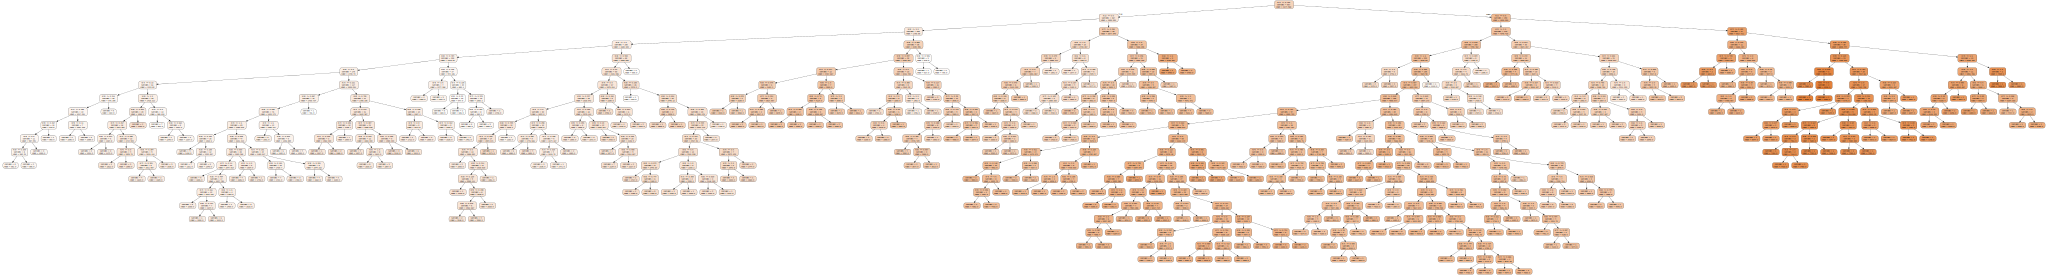

In [17]:
with open("mytree.dot") as f:
    dot_graph=f.read()
graphviz.Source(dot_graph).render('Modified Regression Tree')
graphviz.Source(dot_graph)

### Nodes and Leaf Nodes

In [18]:
totalnodes,leaf=nodes(tree)
print "Total Number of Nodes :",totalnodes
print "Total Number of Leaf Nodes :",leaf

Total Number of Nodes : 649
Total Number of Leaf Nodes : 325


### Extracting Importance of Features

In [19]:
imp=tree.feature_importances_

### Variables that appears in the tree

In [20]:
print "List of Variables that appear in the tree"
print "-----------------------------------------"
for i in range(0,len(imp)):
    if imp[i]>0:
        print dict1[i]

List of Variables that appear in the tree
-----------------------------------------
Season
Year
Month
Holiday
Weekday
Working Days
Weather
Temperature
Humidity
Windspeed


### Important Variables

In [21]:
print "List of Important Variables"
print "---------------------------"
for i in range(0,len(imp)):
    if imp[i]>=0.03:
        print dict1[i]

List of Important Variables
---------------------------
Season
Year
Temperature
Humidity


### Calculating Mean Square Error

In [22]:
pred_value = tree.predict(data_test)
mse2 = MSE(pred_value,value_test)
print "Mean Square Error for Case 2:",mse2

Mean Square Error for Case 2: 473430.391892


# Comparisons of both the cases

In [23]:
if mse1<mse2:
    print "\nRe-coding the months does not improves the fit"
else:
    print "\nRe-coding the months improves the fit"


Re-coding the months does not improves the fit
